# Behavior of the median filter spike train.

## DW (2015.11.23)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from scipy.signal import medfilt, triang
import gitInformation

In [2]:
%matplotlib inline

In [3]:
gitInformation.printInformation()

Information about this notebook
Date: 2015-12-01
Python Version: 2.7.10 |Anaconda 2.4.0 (32-bit)| (default, Oct 28 2015, 14:01:20) [MSC v.1500 32 bit (Intel)]
Git directory: C:\Users\Dominik\Documents\GitRep\kt-2015-DSPHandsOn\.git
Current git SHA: 80acc6b1248e14ab92ca91c67077ac735a992277
Remotes: fork, origin, 
Current branch: master
fork remote URL: http://github.com/dowa4213/kt-2015-DSPHandsOn.git
origin remote URL: https://github.com/ktakagaki/kt-2015-DSPHandsOn.git


In [26]:
# Generating data
tri = np.array([0, 1, 2, 3, 4, 5, 4, 3, 2, 1,0])
tri2 = np.array([1, 2, 3, 4, 5, 4, 3, 2, 1, 0])
tri = tri/5.
tri2 = tri2/5.
points = np.array([30, 32, 35, 27, 25, 39, 23, 56])
# Calculate the cumulative sum of the elements 
points = np.cumsum(points)

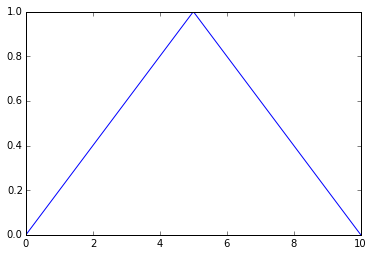

In [27]:
plt.plot(tri)

In [13]:
x = np.zeros(30)
data = np.append(tri,x)
for i in points:
    x = np.zeros(i)
    data = np.append(data,tri2)
    data = np.append(data,x)

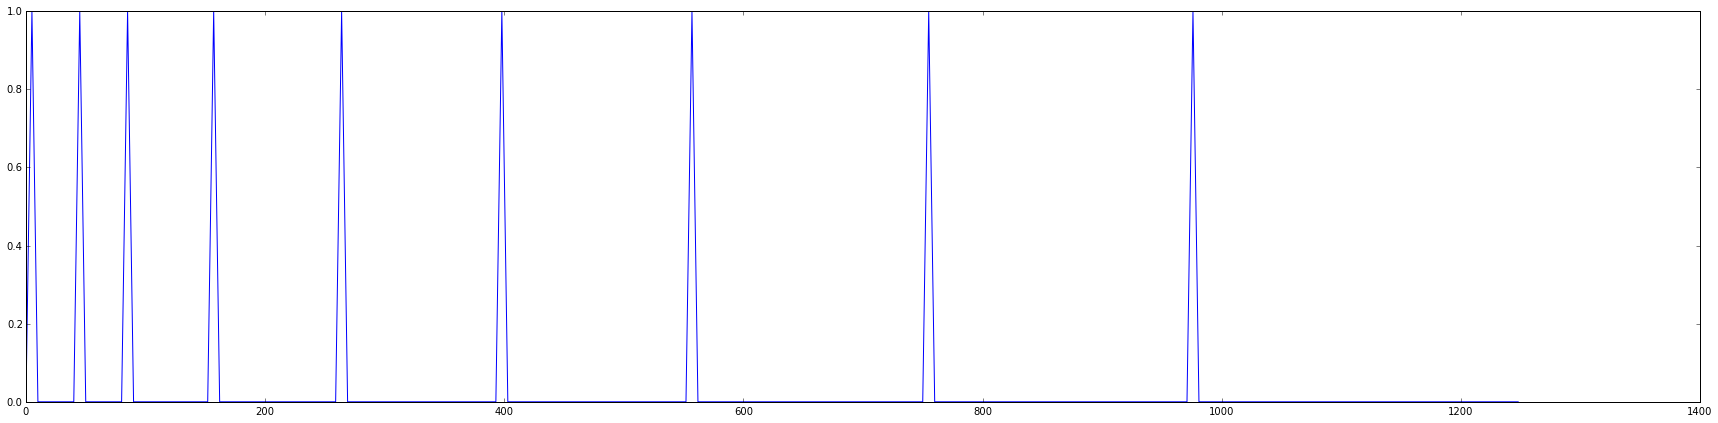

In [14]:
plt.figure(figsize=(30,7))
plt.plot(data)

In [20]:
noise = np.random.normal(0,0.1, len(data))
noised_data = noise + data

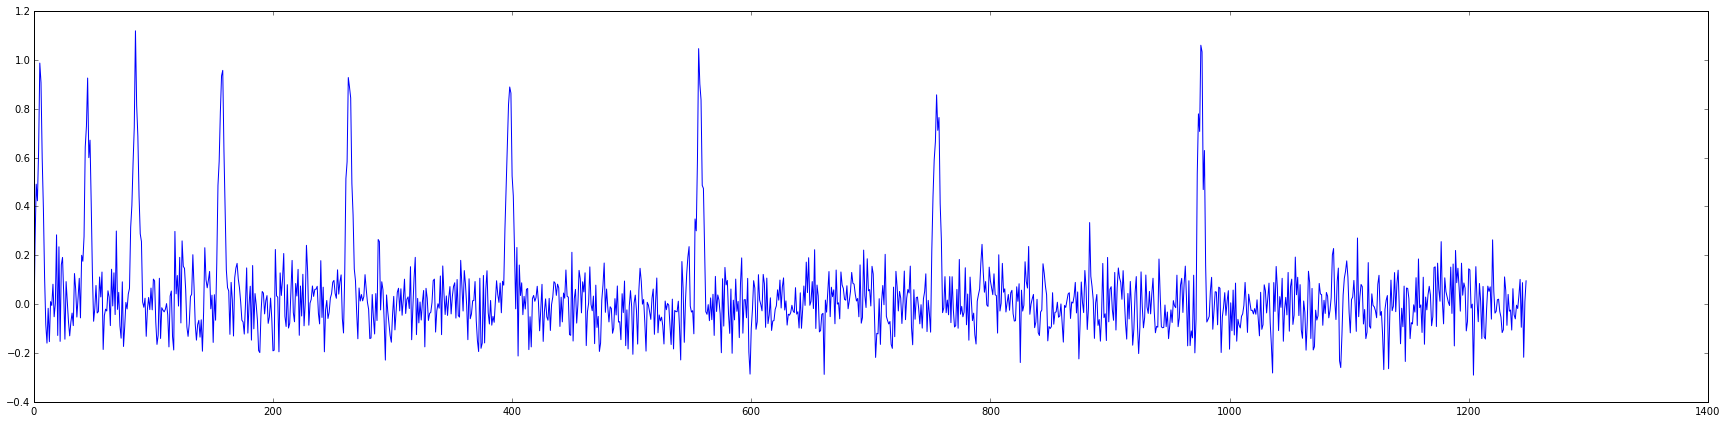

In [21]:
plt.figure(figsize=(30,7))
plt.plot(noised_data)

In [22]:
wl = np.array([3, 5, 7, 9, 11, 15, 21, 25, 31, 35, 41, 45, 51])

In [23]:
filtered = np.zeros((len(data), len(wl)))
count = -1
for w in wl:
    count = count + 1
    filtered[:,count] = medfilt(noised_data, w)

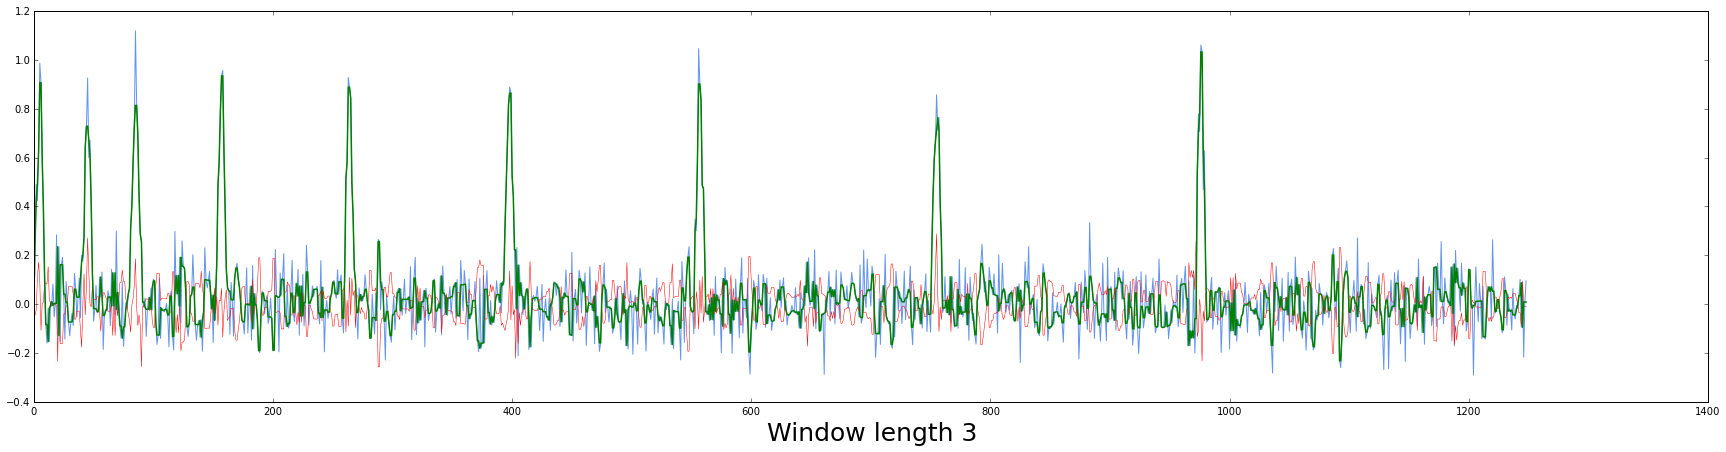

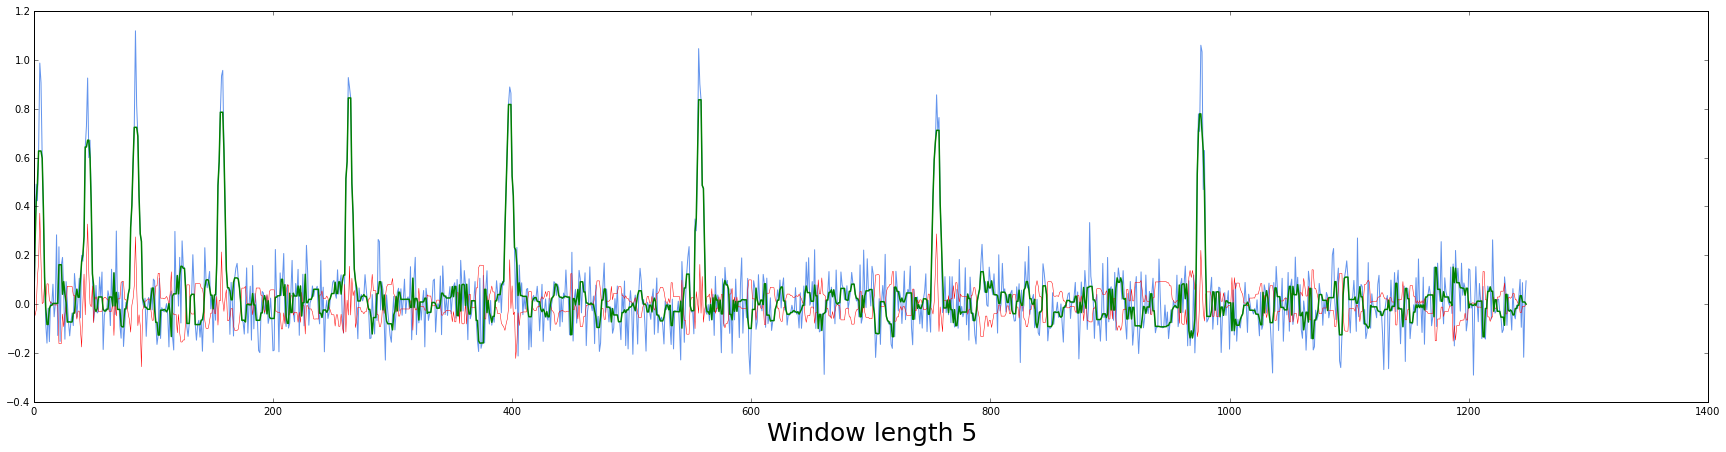

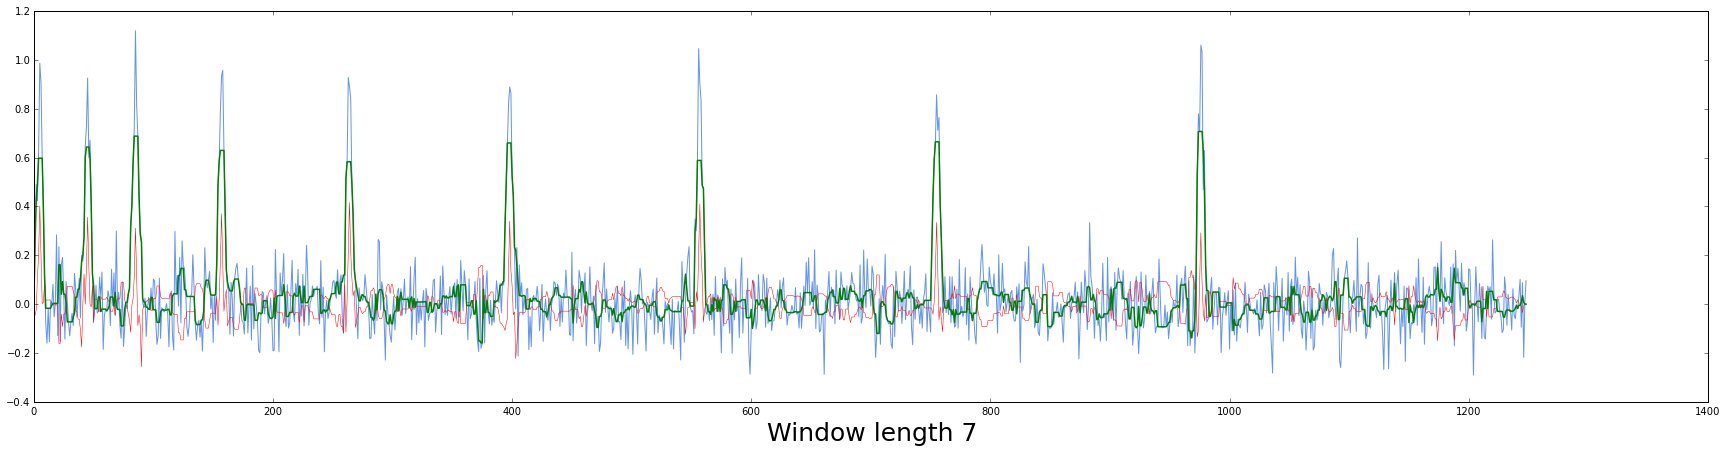

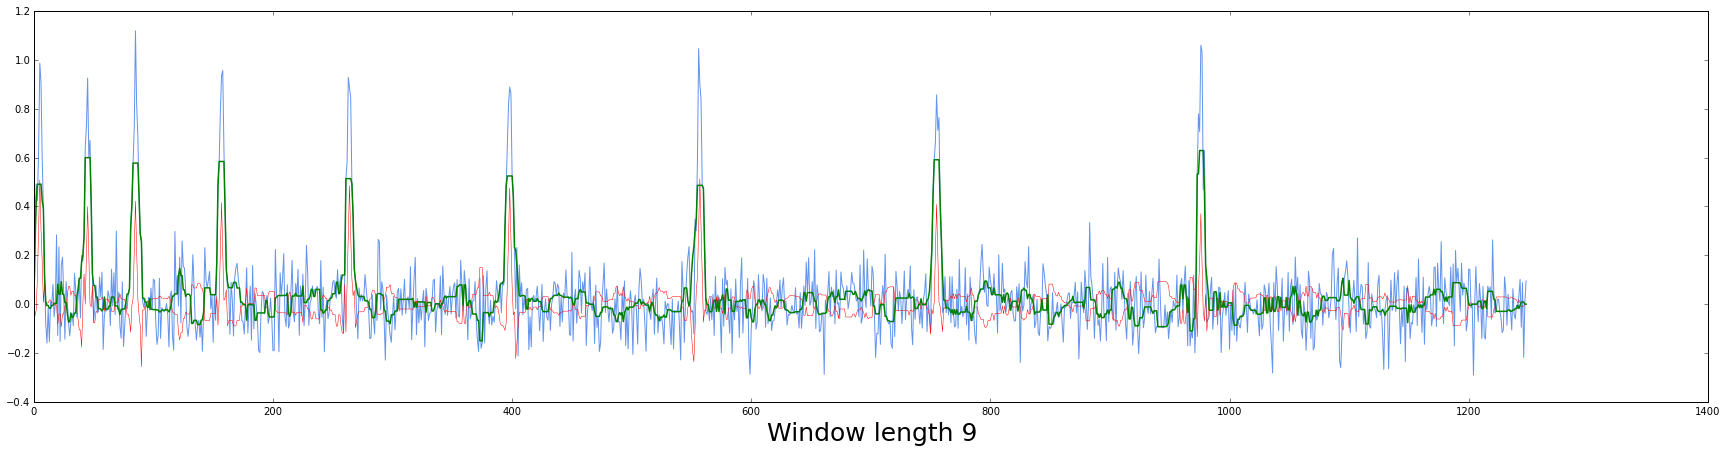

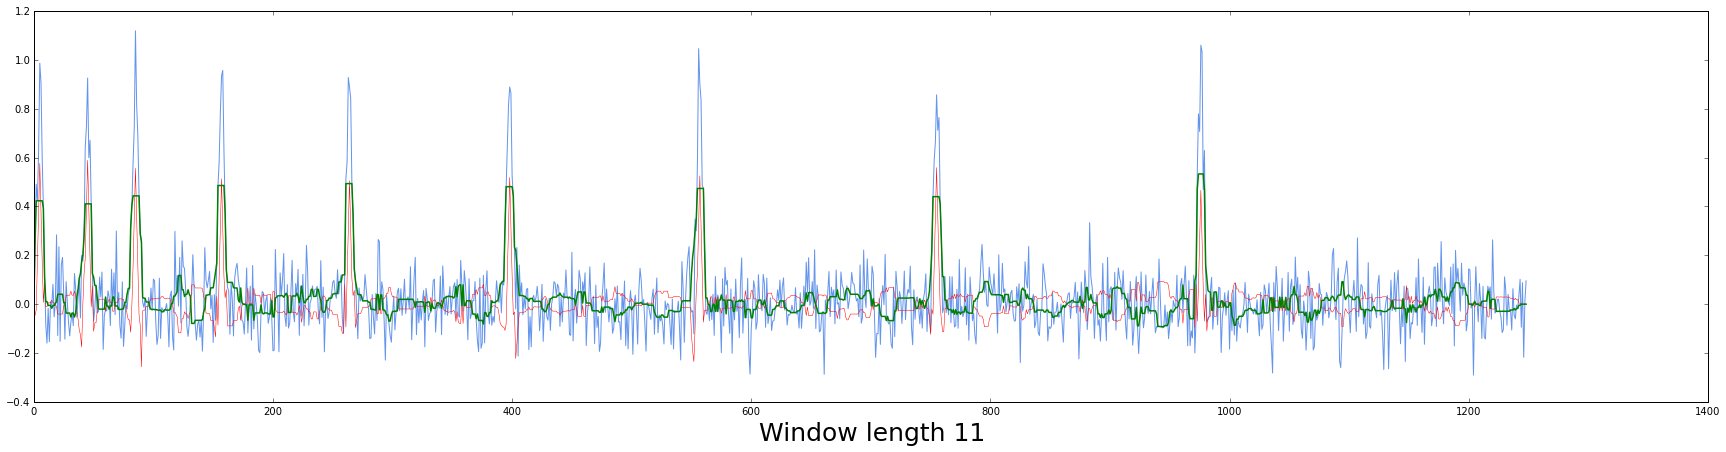

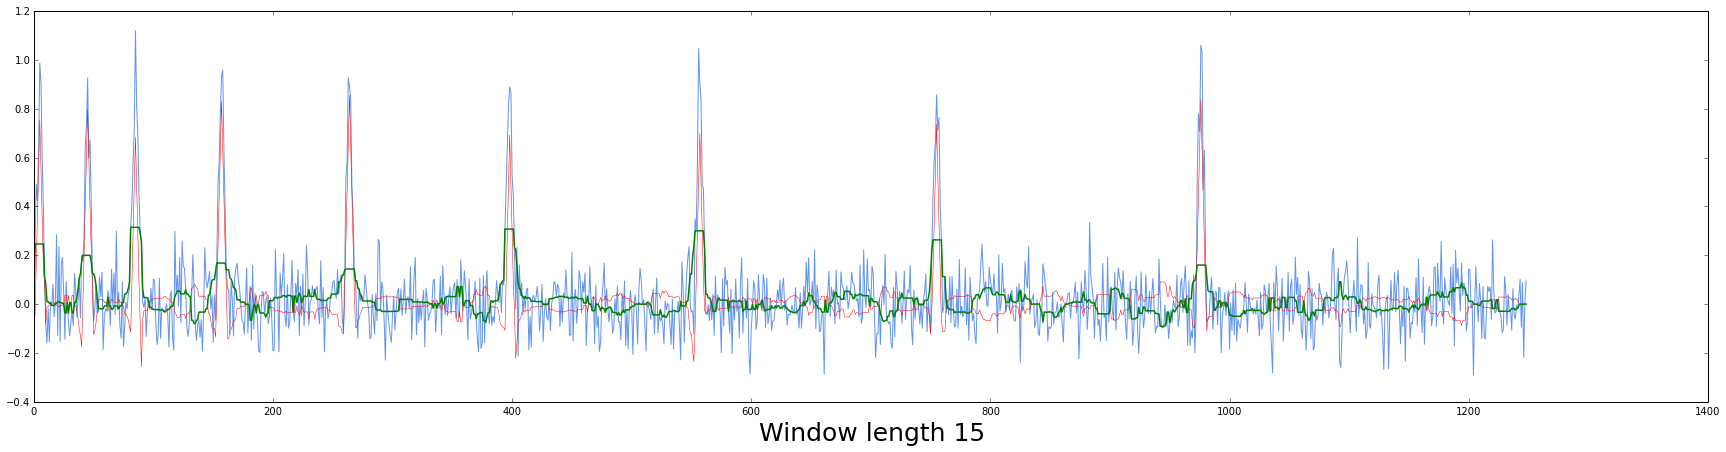

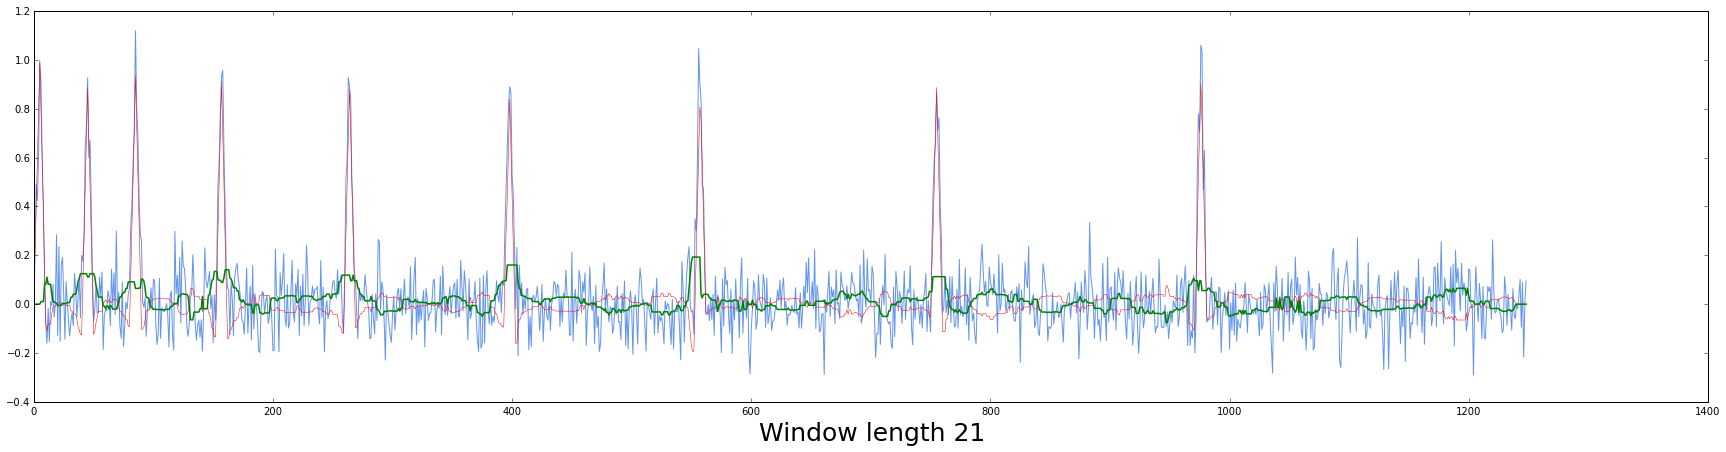

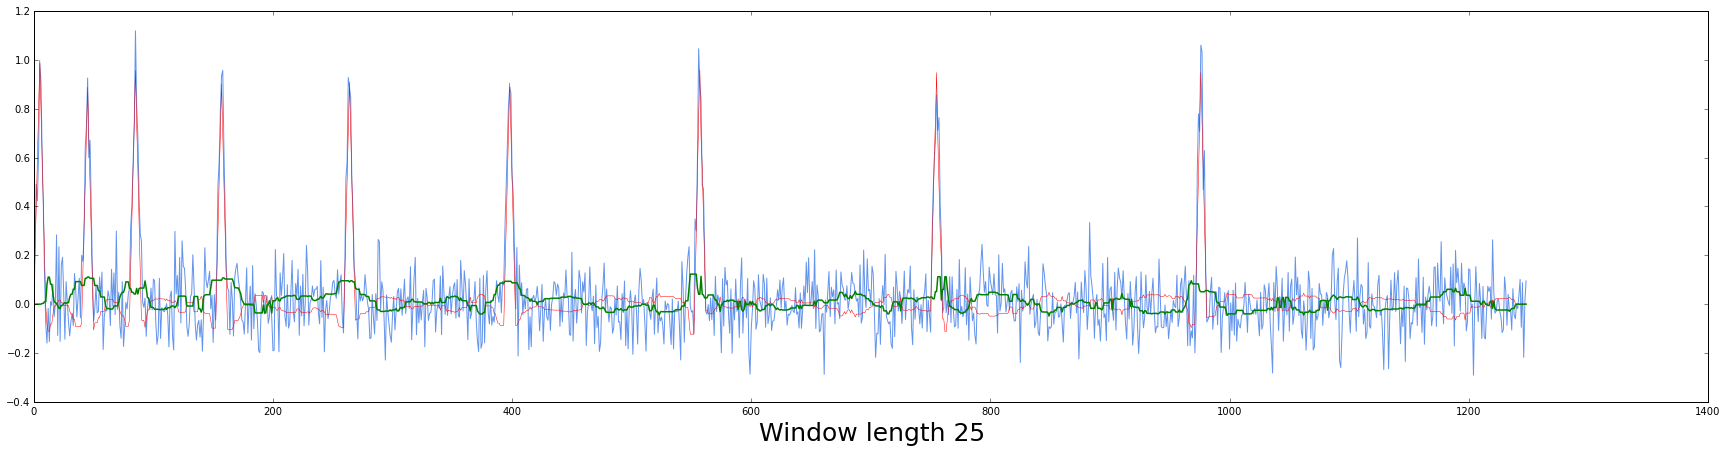

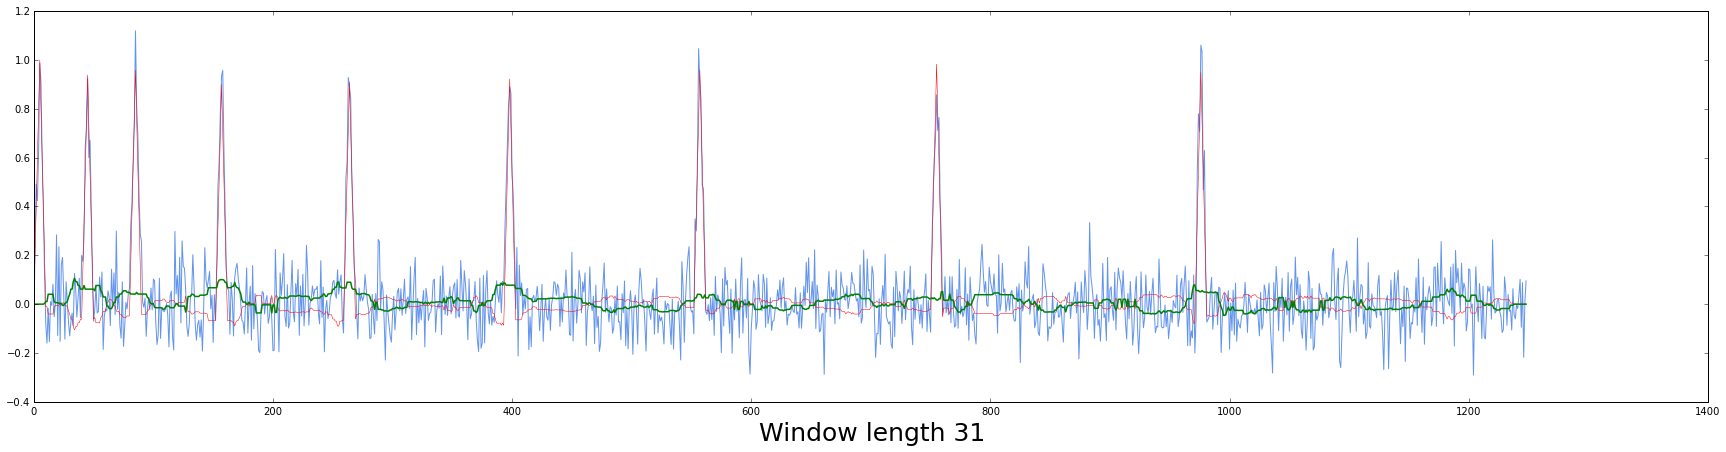

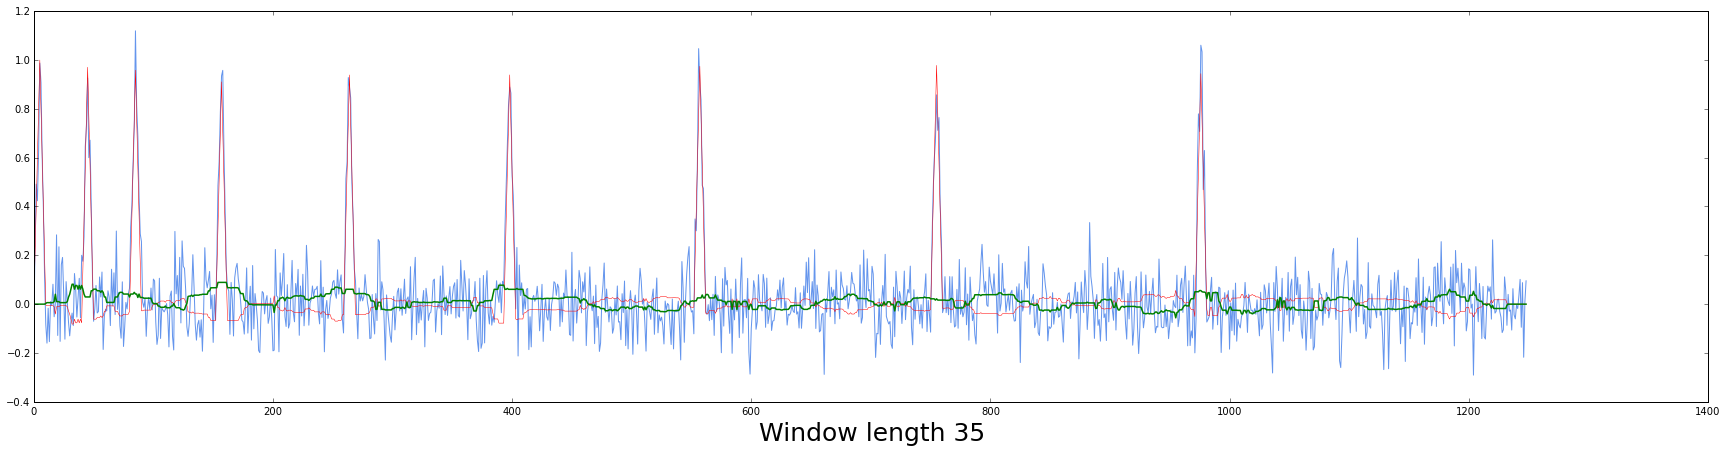

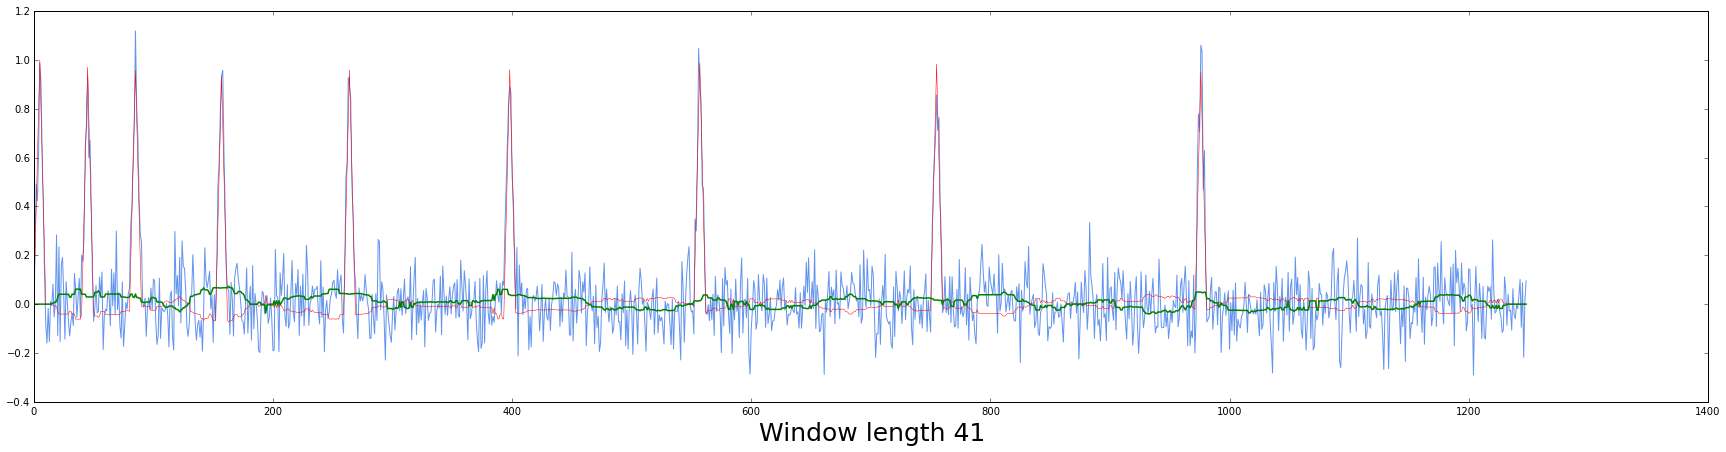

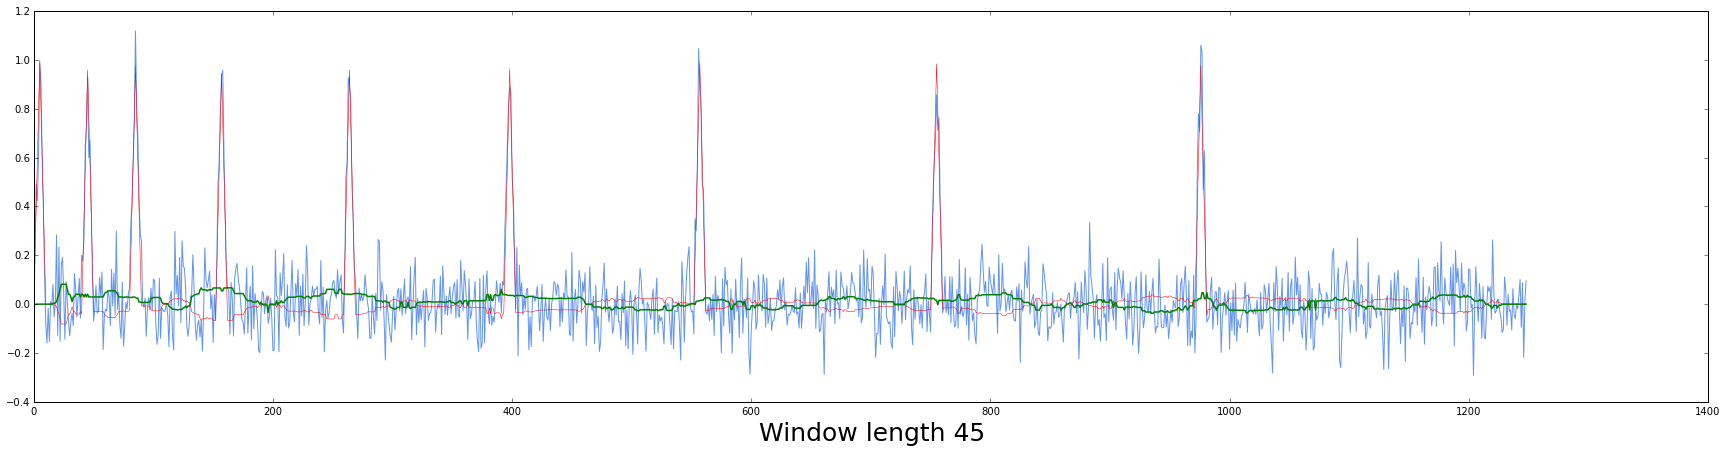

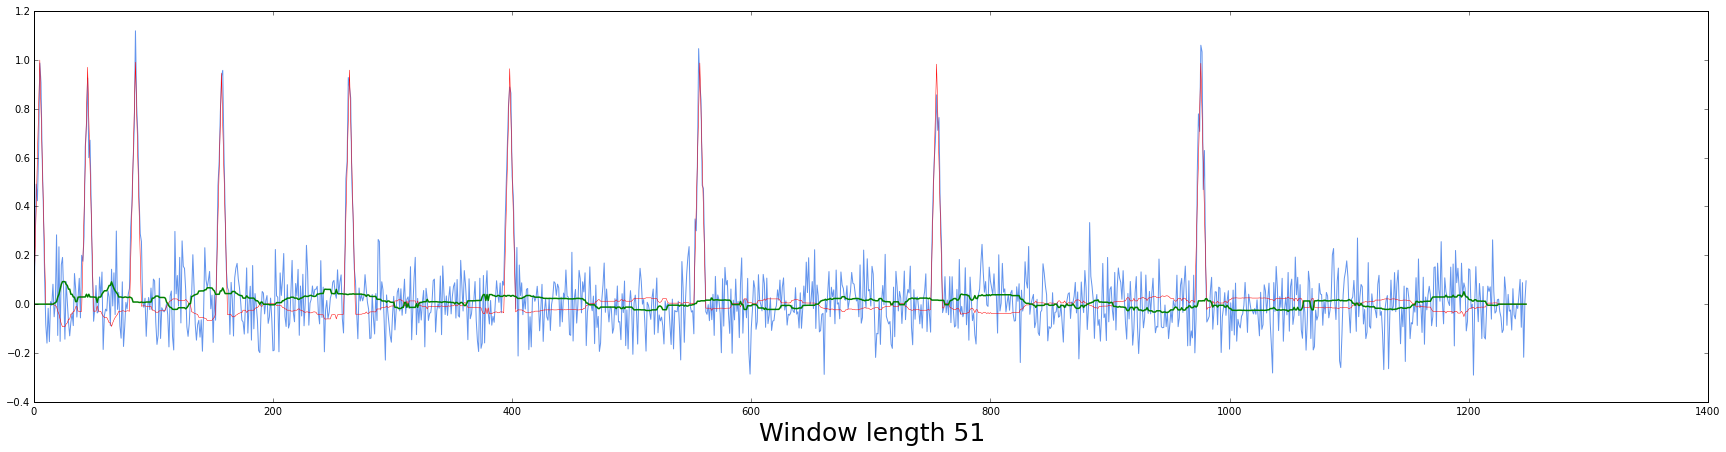

In [25]:
pp = PdfPages('noised spike train.pdf')
count = -1
for p in wl: 
    count = count + 1
    fig = plt.figure(count, figsize=(30,7))
    plt.plot(noised_data, color = 'cornflowerblue')
    plt.plot(data-filtered[:,count], color = 'r', lw = 0.5)
    plt.plot(filtered[:,count], color = 'g', lw = 1.5)
    plt.xlabel('Window length ' + str(p), fontsize=25)
    pp.savefig(fig)
pp.close()